In [ ]:
# references:
# http://aidiary.hatenablog.com/entry/20140622/1403403301

In [3]:
%matplotlib inline
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

## 指数分布族における逆変換法
\begin{align}
f(x; \lambda) &= 
\left \{ \begin{array}{ll}
    \lambda e^{-\lambda x} & (x \geq 0) \\
    0 & (x < 0)
\end{array} \right. \\
F(x; \lambda) &= \left \{ \begin{array}{ll}
    1 - e^{-\lambda x} & (x \geq 0) \\
    0 & (x < 0)
\end{array} \right. \\
\end{align}

累積分布の逆関数は左辺を$u$と置いて$x$について解けばよい．

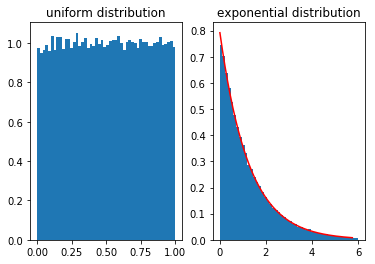

In [40]:
n_samples = 100000
n_bins = 50

# sampling from uniform distribution U(0, 1)
u = scipy.stats.uniform()
u_samples = u.rvs(n_samples)

# 逆変換法により，指数分布族に変換する
# y = - \ln (1 - z) / \lambda
lambda_ = 0.8
y_samples = - np.log(1 - u_samples) / lambda_

#  真の分布
rv = scipy.stats.expon(scale=1 / lambda_)
x_true = np.linspace(rv.ppf(0.01), rv.ppf(0.99), n_samples)
y_true = rv.pdf(x_true)

# plot
fig, ax = plt.subplots(1, 2)
# plot uniform distribution
ax[0].hist(u_samples, n_bins, normed=True)
ax[0].set_title('uniform distribution')
# plot exponential distribution
ax[1].hist(y_samples, n_bins, normed=True, range=(0, 6))
ax[1].plot(x_true, y_true, 'r-')
ax[1].set_title('exponential distribution')

plt.show()